In [1]:
import pandas as pd 
import numpy as np
import torch
import torchvision
import torchaudio 
from tqdm import tqdm
import os 
from torchaudio.transforms import Spectrogram

file_names = [e for e in os.walk('data')][0][2]
dir_name = 'data'

In [2]:
SAMPLE_RATE = 0
data = []
for file in tqdm(file_names[:30]):
    waveform, sample_rate = torchaudio.load(f"{dir_name}/{file}")
    data.append(waveform.mean(dim=0, keepdim=True))

100%|███████████████████████████████████████████████████████████████████████████████████| 30/30 [00:13<00:00,  2.17it/s]


In [3]:
data[0].shape

torch.Size([1, 9217951])

In [4]:
data[0][0]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

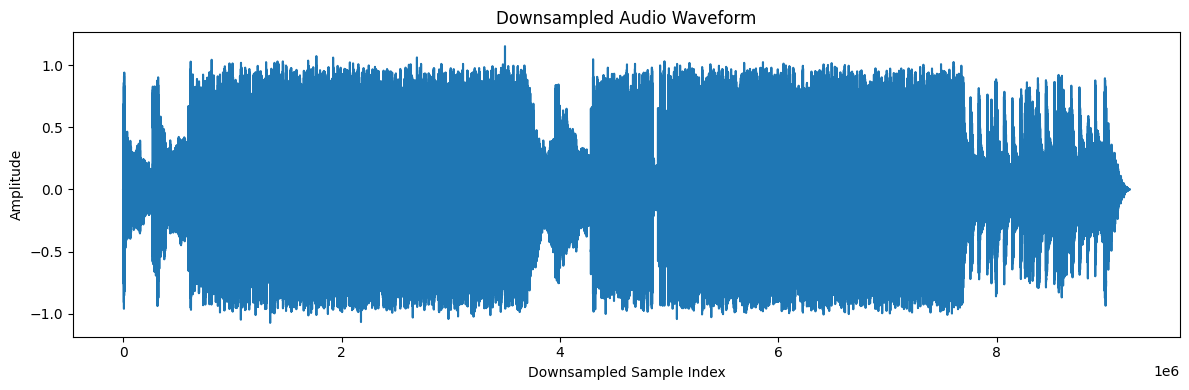

In [7]:
import matplotlib.pyplot as plt

mono = data[0][0]
downsample_factor = 1
downsampled = mono[::downsample_factor]

plt.figure(figsize=(12, 4))
plt.plot(downsampled)
plt.title("Downsampled Audio Waveform")
plt.xlabel("Downsampled Sample Index")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()


In [78]:

transform = Spectrogram(n_fft=1024, power=None)
spec = transform(mono)

In [79]:
spec.shape

torch.Size([513, 18004])

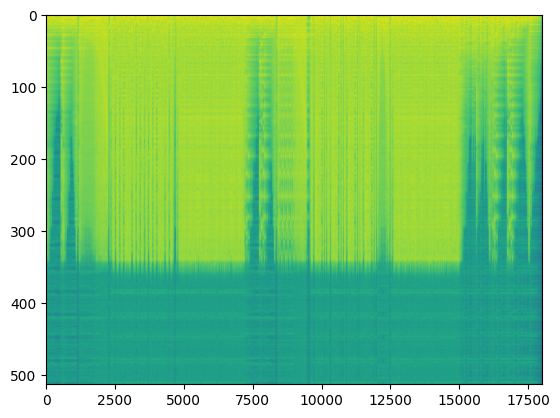

In [87]:
plt.imshow((spec.real**2 + spec.imag**2).log2(), cmap='viridis', aspect='auto')

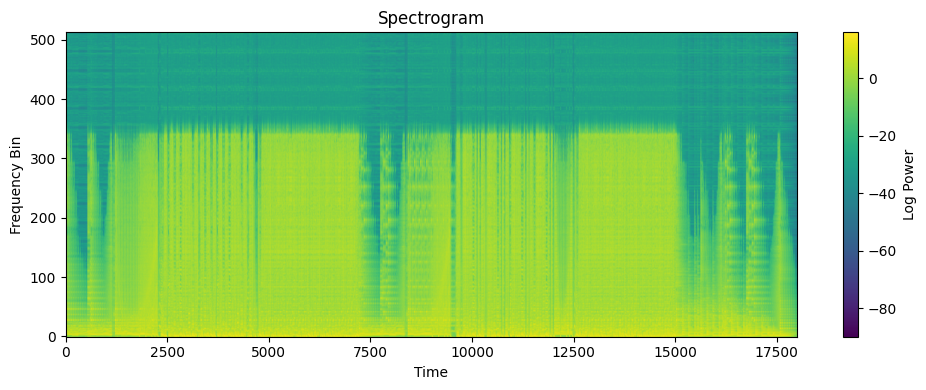

In [89]:

plt.figure(figsize=(10, 4))
plt.imshow((spec.real**2 + spec.imag**2).log2(), origin="lower", aspect="auto", cmap="viridis")
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency Bin")
plt.colorbar(label="Log Power")
plt.tight_layout()
plt.show()


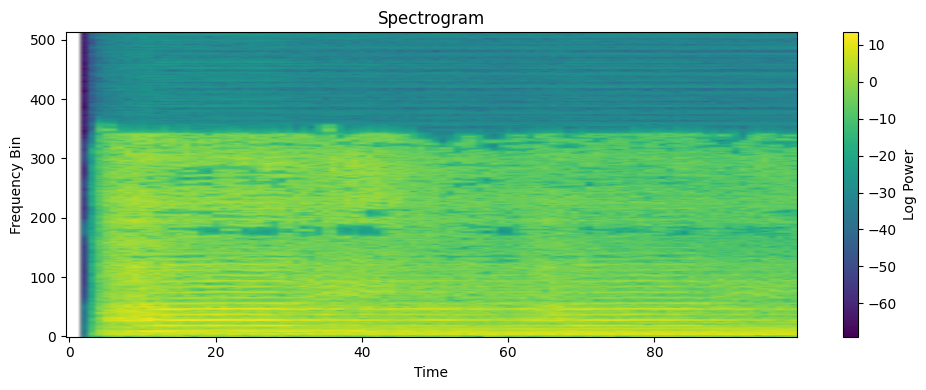

In [90]:

plt.figure(figsize=(10, 4))
plt.imshow((spec.real**2 + spec.imag**2)[:, :100].log2(), origin="lower", aspect="auto", cmap="viridis")
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency Bin")
plt.colorbar(label="Log Power")
plt.tight_layout()
plt.show()


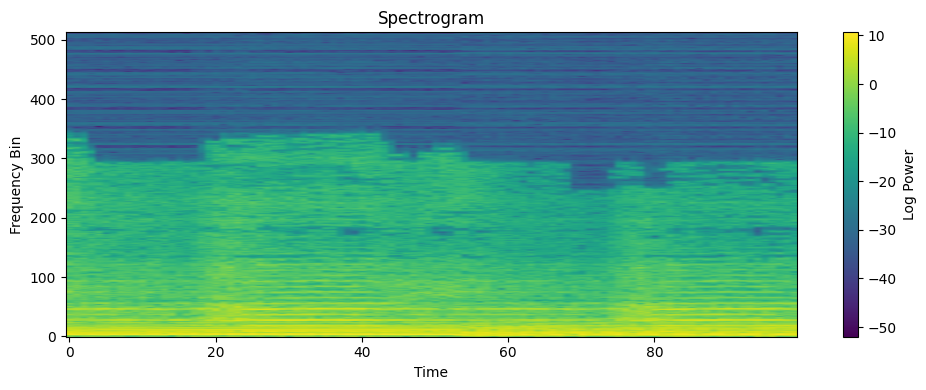

In [91]:

plt.figure(figsize=(10, 4))
plt.imshow((spec.real**2 + spec.imag**2)[:, 100:200].log2(), origin="lower", aspect="auto", cmap="viridis")
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency Bin")
plt.colorbar(label="Log Power")
plt.tight_layout()
plt.show()


In [92]:
X = []
seq_len = 100
for e in data:
    e = transform(e)[0]
    for i in range(0, e.shape[1], seq_len):
        X.append(e[:, i:i+seq_len])

        

In [93]:
transform(data[0])[0].shape

torch.Size([513, 18004])

In [94]:
len(X)

6420

In [95]:
X[0].shape

torch.Size([513, 100])

In [104]:
from torchaudio.transforms import InverseSpectrogram
inv_transform = InverseSpectrogram(n_fft=1024)
original = inv_transform(X[1].unsqueeze(dim=0).unsqueeze(dim=0))

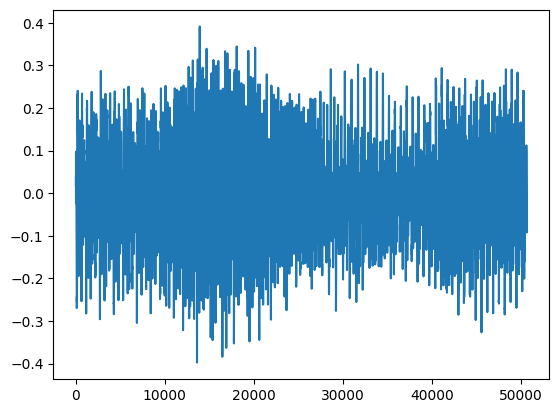

In [105]:
plt.plot(original.squeeze())

In [111]:
from IPython.display import Audio

waveform = original.squeeze().detach().cpu().numpy()

# Play audio (default sample_rate is 22050 or whatever your original is)
Audio(waveform, rate=sample_rate)  # <-- set this to your actual sample rate


In [110]:
SAMPLE_RATE

0